In [18]:
from keras.models import load_model

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime

In [20]:
import keras 
from keras.models import Sequential
from keras.layers import Activation,Dense,Conv2D,Dropout,Flatten,BatchNormalization,Reshape,UpSampling2D,Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop

In [21]:
G=load_model('G.h5')
D=load_model('D.h5')

In [22]:
G.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_13 (Batc (None, 12544)             50176     
_________________________________________________________________
activation_21 (Activation)   (None, 12544)             0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 14, 14, 128)       819328    
__________

In [23]:
D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 256)         819456    
__________

In [24]:
ds=pd.read_csv('../data/mnist_data/train.csv')
data=np.array(ds)

In [25]:
X=data[:10000,1:]
X=np.reshape(X,(10000,28,28,1))

In [26]:
#optimizer = RMSprop(lr=0.0008, clipvalue=1.0, decay=6e-8)
#D.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [27]:
optimizer_G = RMSprop(lr=0.0004, clipvalue=1.0, decay=3e-8)
AM=Sequential()
AM.add(G)
AM.add(D)
AM.compile(loss='binary_crossentropy',optimizer=optimizer_G,metrics=['accuracy'])

In [28]:
t1=datetime.now()
for epoch in range(300):
    noise=np.random.uniform(-1,1,size=[1000,100])
    images_fake=G.predict(noise)
    rand_no=random.randint(0,8999)
    x=np.concatenate((X[rand_no:rand_no+1000],images_fake))
    y=np.ones([2000,1])
    y[1000:,:]=0
    D.train_on_batch(x, y)
    y = np.ones([1000, 1])
    noise = np.random.uniform(-1.0, 1.0, size=[1000, 100])
    a_loss=AM.train_on_batch(noise,y)
t2=datetime.now()

In [29]:
print t2-t1

16:04:16.047073


In [30]:
G.save('G.h5')
D.save('D.h5')

In [31]:
noise=np.random.uniform(-1,1,size=[10,100])
images_fake=G.predict(noise)

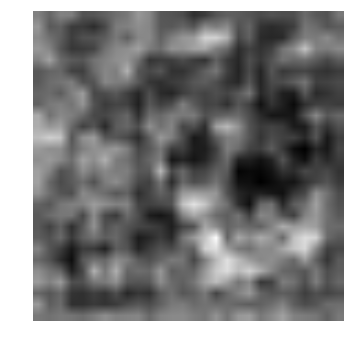

In [32]:
test=np.reshape(images_fake[8],(28,28))
plt.imshow(test,cmap='gray')
plt.axis('off')
plt.show()

## 